# FEATURE ANALYSIS: IN-DEPTH ANALYSIS OF RELATIONSHIPS BETWEEN VARIABLES, MODEL DEVELOPMENT AND EVALUATION

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("tracks_df.csv")
df.columns

Index(['danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'popularity', 'explicit',
       'id', 'name', 'release_date', 'artists', 'available_markets', 'tempo',
       'loudness', 'duration_min'],
      dtype='object')

In [2]:
df.describe()

,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,popularity,explicit,available_markets,tempo,loudness,duration_min
count,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000
mean,0.615606,0.674930,5.275823,0.491487,0.088328,0.209948,0.028328,0.180256,0.510667,0.626629,0.214529,0.904411,3.266742,3.872872,3.920545
std,0.156930,0.196081,3.521682,0.500211,0.082980,0.253316,0.130250,0.138150,0.218413,0.168153,0.410728,0.265428,1.826670,1.723422,1.189174
min,0.159000,0.047200,0.000000,0.000000,0.023200,0.000003,0.000000,0.021500,0.054700,0.090000,0.000000,0.012658,1.000000,1.000000,2.000000
25%,0.509000,0.553000,2.000000,0.000000,0.037800,0.020500,0.000000,0.093000,0.340000,0.530000,0.000000,0.987342,2.000000,3.000000,3.000000
50%,0.623000,0.700000,5.000000,0.000000,0.054200,0.092100,0.000002,0.125000,0.509000,0.660000,0.000000,1.000000,3.000000,4.000000,4.000000
75%,0.737000,0.832000,8.000000,1.000000,0.099800,0.313000,0.000254,0.225000,0.675000,0.760000,0.000000,1.000000,5.000000,5.000000,4.000000
max,0.965000,0.988000,11.000000,1.000000,0.461000,0.978000,0.966000,0.873000,0.963000,1.000000,1.000000,1.000000,6.000000,6.000000,21.000000


Unordered Categorical Values: "key", "time_signature", "mode", "explicit"

Ordered Categorical Values: "tempo", "loudness", "duration_min"

Numerical Values: "danceability", "energy", "speechiness", "acousticness",
    "instrumentalness", "liveness", "valence", "available_markets", "popularity"

Audio-Specific Features: "danceability", "energy", "speechiness", "acousticness",
    "instrumentalness", "liveness", "valence", "mode", "key", "time_signature",
    "tempo", "loudness", "duration_min"

Success Metrics: "popularity", "available_markets"

Unique Features: 'id', 'name', 'release_date', 'artists'

# Q1: IS POPULARITY CORRELATED TO THE COUNT OF AVAILABLE MARKETS?

In [3]:
df[["available_markets", "popularity"]].corr()

,available_markets,popularity
available_markets,1.000000,-0.000071
popularity,-0.000071,1.000000


Result: No correlation between available markets and popularity maybe because all songs are available in such markets no matter they are popular.

# Q2: WHICH VARIABLES ARE STATISTICALLY THE MOST IMPORTANT FOR POPULARITY?

                          0
 0.027098      danceability
 0.000403            energy
 0.056729       speechiness
 0.061070              mode
-0.108373      acousticness
 0.011650  instrumentalness
 0.019129          liveness
-0.050817           valence
 0.100624          explicit
-0.003566             tempo
 0.003428          loudness
-0.013106      duration_min


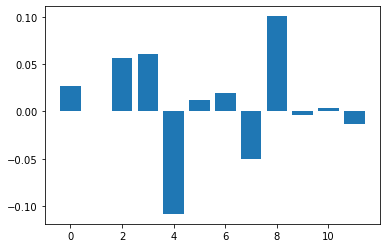

In [4]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
model = LinearRegression()
X = df[["danceability", "energy", "speechiness", "mode", "acousticness", "instrumentalness", "liveness", "valence", "explicit", "tempo", "loudness", "duration_min"]]
y = df["popularity"]
model.fit(X, y)
importance = model.coef_
print(pd.DataFrame(X.columns, importance))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Result: Popularity is not dependent upon any of these features.

# Q3: WHICH VARIABLES ARE PROBABLY CORRELATED?

In [5]:
corr_matrix = pd.DataFrame(df.corr().fillna(0))
corr_pos = corr_matrix[corr_matrix > 0.3].notnull()
corr_neg = corr_matrix[corr_matrix < -0.3].notnull()
columns = indexes = corr_pos.columns
for row in range(len(indexes)):
    for col in range(len(columns)):
        if(row <= col):
            pass
        elif(corr_pos.iloc[row, col] == True):
            print(indexes[row], " <-> ", columns[col], "(", corr_matrix.iloc[row, col], ")")
        elif(corr_neg.iloc[row, col] == True):
            print(indexes[row], " <-> ", columns[col], "(", corr_matrix.iloc[row, col], ")")

acousticness  <->  energy ( -0.6872568666615878 )
valence  <->  danceability ( 0.3293648412609568 )
valence  <->  energy ( 0.38789596159616285 )
explicit  <->  danceability ( 0.338737170319219 )
explicit  <->  speechiness ( 0.37695914423978344 )
explicit  <->  popularity ( 0.3063164547406404 )
loudness  <->  energy ( 0.4185805870143379 )


=> Energy of the song is dependent on loudness and valence of the song, and most importantly, inversely proportional on acousticness. 

=> Whether a song is explicit is correlated to danceability, popularity and speechiness. In Speechiness <-> Explicit relationship, there is nothing to examine, because it is a no-brainer to think that speechiness is the necessary condition to have an explicit song. Popularity and danceability seem to be suitable for further analysis.

=> Valence is correlated to not also energy but also danceability, which makes sense.

# Q4: MAY MODE AND KEY HAVE RELATIONSHIP WITH OTHER AUDIO FEATURES ?  

Key: The note that the song is based on (e.g. C, D#, G)

Mode: Whether the key is followed  by a minor or a major chord progression

Key & Mode: 12 * 2 = 24 possible combinations

Key: [0-11] => [C-B] / Mode: [0, 1] => [Minor, Major]

In [6]:
df.columns

Index(['danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'popularity', 'explicit',
       'id', 'name', 'release_date', 'artists', 'available_markets', 'tempo',
       'loudness', 'duration_min'],
      dtype='object')

In [7]:
df_group = df[["energy", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "mode", "key"]].groupby(["mode", "key"]).mean()
df_group.describe()

,energy,speechiness,acousticness,instrumentalness,liveness,valence
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,0.677230,0.086064,0.214271,0.026509,0.182327,0.509443
std,0.046814,0.022459,0.071684,0.019060,0.022842,0.043487
min,0.598742,0.050827,0.102997,0.000680,0.129532,0.442600
25%,0.642433,0.068974,0.157154,0.013592,0.173673,0.471603
50%,0.684687,0.080637,0.209958,0.024000,0.185030,0.500845
75%,0.713753,0.102568,0.264860,0.033040,0.193823,0.545671
max,0.764372,0.140976,0.352648,0.079447,0.234393,0.590605


Result: The selection of any special key or mode does not play a key role on any feature.

                          0
-0.041852      danceability
 0.141525            energy
 0.490694       speechiness
-0.270722      acousticness
 0.002297  instrumentalness
-0.051097          liveness
-0.073176           valence


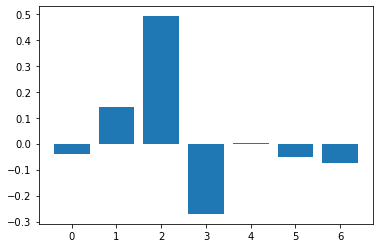

In [8]:
model = LinearRegression()
X = df[["danceability", "energy", "speechiness", "acousticness", "instrumentalness", "liveness", "valence"]]
y = df["mode"]
model.fit(X, y)
importance = model.coef_
print(pd.DataFrame(X.columns, importance))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Result: The most important features related to the mode of the song are speechiness, acousticness and energy

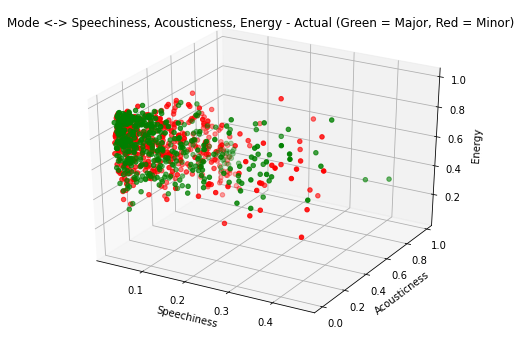

In [9]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[df["mode"] == 0]["speechiness"], df[df["mode"] == 0]["acousticness"], df[df["mode"] == 0]["energy"], color = "red")
ax.scatter(df[df["mode"] == 1]["speechiness"], df[df["mode"] == 1]["acousticness"], df[df["mode"] == 1]["energy"], color = "green")
ax.set_xlabel("Speechiness")
ax.set_ylabel("Acousticness")
ax.set_zlabel("Energy")
ax.set_title("Mode <-> Speechiness, Acousticness, Energy - Actual (Green = Major, Red = Minor)")
plt.show()

In [10]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm, tree
from sklearn import metrics

treemodel = tree.DecisionTreeClassifier()
svmmodel = svm.SVC(kernel = "linear")
logmodel = LogisticRegression()

X = df[["energy", "speechiness", "acousticness"]] 
X_train, X_test, y_train, y_test = train_test_split(X, df["mode"], test_size = 0.2)

treemodel.fit(X_train, y_train)
svmmodel.fit(X_train, y_train)
logmodel.fit(X_train, y_train)

y_pred_svm = svmmodel.predict(X_test)
y_pred_tree = treemodel.predict(X_test)
y_pred_log = logmodel.predict(X_test)

print("treemodel: ", cross_val_score(treemodel, X, df["mode"], cv = 5).mean())
print("svmmodel: ", cross_val_score(svmmodel, X, df["mode"], cv = 5).mean())
print("logmodel: ", cross_val_score(logmodel, X, df["mode"], cv = 5).mean())

logfunction = [x[0] for x in logmodel.predict_proba(X)]

treemodel:  0.5596045197740114
svmmodel:  0.5652157164869029
logmodel:  0.5822419106317411


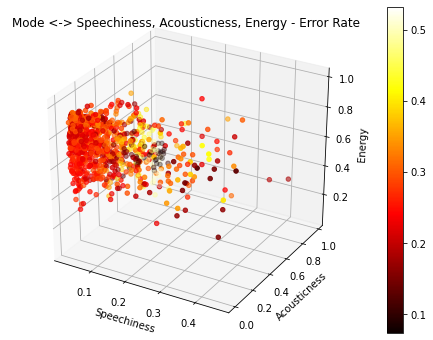

In [11]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(df["speechiness"], df["acousticness"], df["energy"], cmap = "hot", c = (logfunction - df["mode"])**2)
ax.set_xlabel("Speechiness")
ax.set_ylabel("Acousticness")
ax.set_zlabel("Energy")
ax.set_title("Mode <-> Speechiness, Acousticness, Energy - Error Rate")
fig.colorbar(p)
plt.show()

Result: Despite the fact that the correlation coefficients between mode and other features are moderately significant, the features energy, speechiness and acousticness do not necessarily achieve information gain, as seen above. 

In [12]:
df_key = pd.get_dummies(df["key"], drop_first = True)
df_y = df[["danceability", "energy", "speechiness", "acousticness", "instrumentalness", "liveness", "valence"]]
for y_val in df_y.columns:
    model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(df_key, df[y_val], test_size = 0.2)
    model.fit(X_train, y_train)
    print(y_val, cross_val_score(model, df_key, df[y_val], cv = 5).mean())

danceability -0.0505561716345162
energy -0.059717074120259415
speechiness -0.021761907237255018
acousticness -0.06925990213429171
instrumentalness -0.09185838656890528
liveness -0.03260016182086358
valence -0.036832276908400984


Result: The key of the song does not play any role on these features

# Q5: ENERGY <-> LOUDNESS, VALENCE, ACOUSTICNESS

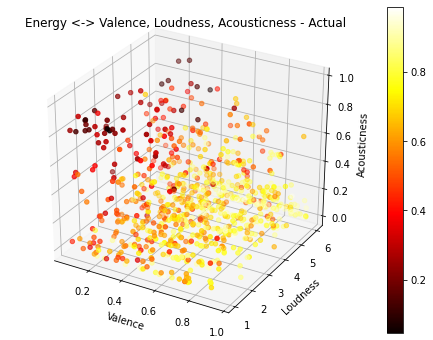

In [13]:
X = df[["valence", "loudness", "acousticness"]]
y = df["energy"]
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(df["valence"], df["loudness"], df["acousticness"], cmap = "hot", c = df["energy"])
ax.set_xlabel("Valence")
ax.set_ylabel("Loudness")
ax.set_zlabel("Acousticness")
ax.set_title("Energy <-> Valence, Loudness, Acousticness - Actual")
fig.colorbar(p)
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = LinearRegression()
model.fit(X_train, y_train)
score = cross_val_score(model, X, y, cv = 5)
score.mean()

0.5696952617701265

In [15]:
def energy_function(valence, loudness, acousticness):
    return 0.16455549*valence + 0.03074493*loudness - 0.43627614*acousticness + 0.5758054268569384

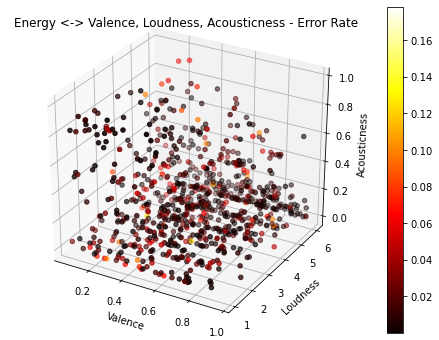

In [16]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(df["valence"], df["loudness"], df["acousticness"], cmap = "hot", c = (energy_function(df["valence"], df["loudness"], df["acousticness"]) - df["energy"])**2)
ax.set_title("Energy <-> Valence, Loudness, Acousticness - Error Rate")
ax.set_xlabel("Valence")
ax.set_ylabel("Loudness")
ax.set_zlabel("Acousticness")
fig.colorbar(p)
plt.show()

Result: Valence, loudness and acousticness are indeed good predictors of the energy of the song.

# Q6: EXPLICIT <-> POPULARITY, DANCEABILITY, SPEECHINESS

In [17]:
from scipy.stats import pearsonr
X = df[["popularity", "danceability", "speechiness"]]
y = df["explicit"]
c1, p1 = pearsonr(X["popularity"], y) # :0.30 with very low error
c2, p2 = pearsonr(X["danceability"], y) # :0.34 with very low error
c3, p3 = pearsonr(X["speechiness"], y) #0.38 with very low error

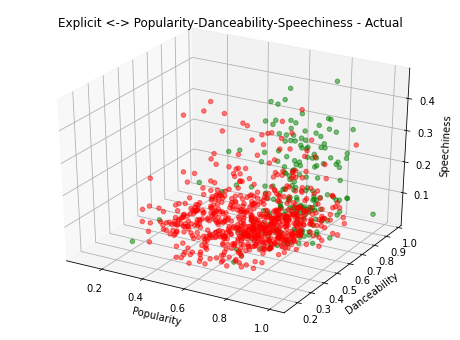

In [18]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[df["explicit"] == 0]["popularity"], df[df["explicit"] == 0]["danceability"], df[df["explicit"] == 0]["speechiness"], color = "red", alpha = 0.5)
ax.scatter(df[df["explicit"] == 1]["popularity"], df[df["explicit"] == 1]["danceability"], df[df["explicit"] == 1]["speechiness"], color = "green", alpha = 0.5)
ax.set_xlabel("Popularity")
ax.set_ylabel("Danceability")
ax.set_zlabel("Speechiness")
ax.set_title("Explicit <-> Popularity-Danceability-Speechiness - Actual")
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
score = cross_val_score(logmodel, X, y, cv = 5)
print(score.mean())
logfunction = [x[0] for x in logmodel.predict_proba(X)]

0.8195557267591166


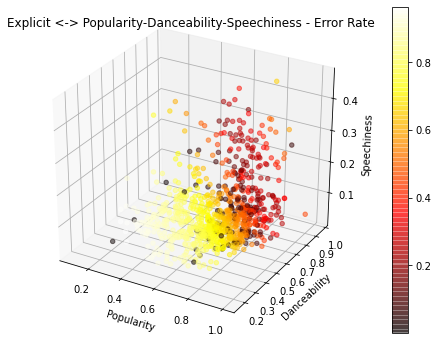

In [20]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(df["popularity"], df["danceability"], df["speechiness"], cmap = "hot", c = (logfunction - df["explicit"])**2, alpha = 0.5)
ax.set_xlabel("Popularity")
ax.set_ylabel("Danceability")
ax.set_zlabel("Speechiness")
ax.set_title("Explicit <-> Popularity-Danceability-Speechiness - Error Rate")
fig.colorbar(p)
plt.show()

Result: Based on speechiness, popularity and danceability of a song, we can predict with whether the content of a song is explicit or not, but it is very difficult to differentiate in songs with lower danceability.

# Q7: VALENCE <-> ENERGY, DANCEABILITY

In [21]:
X = df[["danceability", "energy"]]
y = df["valence"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = LinearRegression()
model.fit(X_train, y_train)
score = cross_val_score(model, X, y, cv = 5)
c1, p1 = pearsonr(df["danceability"], df["valence"]) # :0.33 with very low error
c2, p2 = pearsonr(df["energy"], df["valence"]) # :0.38 with very low error
score.mean()

0.2258105318551001

In [22]:
def valence_function(danceability, energy):
    return 0.4321397*danceability + 0.45032601*energy - 0.05773447731700876

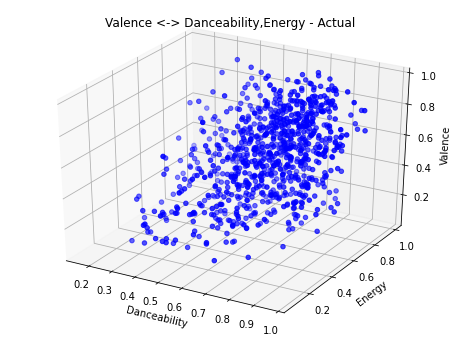

In [23]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["danceability"], df["energy"], df["valence"], color = "blue")
ax.set_xlabel("Danceability")
ax.set_ylabel("Energy")
ax.set_zlabel("Valence")
ax.set_title("Valence <-> Danceability,Energy - Actual")
plt.show()

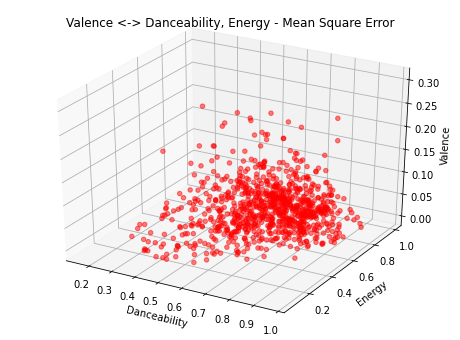

In [24]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["danceability"], df["energy"], (valence_function(df["danceability"], df["energy"]) - df["valence"])**2, color = "red", alpha = 0.5)
ax.set_xlabel("Danceability")
ax.set_ylabel("Energy")
ax.set_zlabel("Valence")
ax.set_title("Valence <-> Danceability, Energy - Mean Square Error")
plt.show()

Result: Despite the fact that valence of any song seem to be moderately correlated to energy and danceability, the overall score of model is too low and the error rate is respectively high as seen in the scatterplot.

# Q8: CHRONOLOGICAL SEQUENCE - ARTIST ANALYSIS

In [25]:
import numpy as np
df_cum = df.set_index(["release_date"]).sort_values(by = ["release_date"], ascending = True)
df_cum["artists"] = df_cum["artists"].str.replace("," , "],[")
df_cum["artists"]
import ast
for i, artist in enumerate(df_cum["artists"]):
    artist = ast.literal_eval(artist)
    artist = np.squeeze(np.array(artist))
    df_cum.iat[i, 13] = artist
listreal = []
listreali = []
listrealid = []
sery = df_cum["artists"]
for i, ser in enumerate(sery):
    listdf = []
    if(not(ser.shape == ())):
        listrow = []
        listreali.append(i)
        listrealid.append(df_cum.iloc[i, 11])
        for artist in ser:
            row = df_cum.iloc[i].copy()
            row["artists"] = artist
            listrow.append(row)
        listdf.extend(listrow) 
    listreal.extend(listdf)
dfreal = pd.DataFrame(listreal)
collab1 = pd.Series(np.ones(len(dfreal.index), dtype = int), index = dfreal.index, name = "collab")
dfreal = pd.concat([dfreal, collab1], axis = 1)
df_cum.drop(df_cum.loc[df_cum['id'].isin(listrealid)].index, inplace=True)
df_cum.drop_duplicates(subset="id", keep="first", inplace=True)
collab0 = pd.Series(np.zeros(len(df_cum.index), dtype = int), index = df_cum.index, name = "collab")
df_cum = pd.concat([df_cum, collab0], axis = 1)
df_cum = df_cum.append(dfreal)
df_cum["artists"] = df_cum["artists"].astype(str)
df_artists = df_cum.groupby(["artists"]).mean().sort_values(by = ["popularity"], ascending = False)
track_count = pd.Series(df_cum["artists"].value_counts(), name = "track_count")
track_count.reindex(df_artists.index)
df_artists = pd.concat([df_artists, track_count], axis = 1)            
df_artists.to_csv("artists_df.csv", mode = "w")
df_cum.to_csv("timeline_df.csv", mode = "w")